#### In this notebook we read IBM stock data from Yahoo website. After, reindexing the dataframe, we calculate the log of returns to get the stationary time series.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
# don't forget to install the package
import pandas_datareader as pdr

In [3]:
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.stattools import adfuller, kpss

In [4]:
data_source='yahoo'
start_date='2007-01-03'
end_date='2021-12-30'
dfIBM=pdr.DataReader('IBM',data_source,start_date,end_date)

In [5]:
dfIBM.head(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2007-01-03,94.072655,92.026772,92.906311,92.992355,9619853.0,57.683769
2007-01-04,94.445503,92.619499,92.973228,93.986618,11008627.0,58.300503
2007-01-05,93.642448,92.648186,93.307838,93.135757,7553480.0,57.772720
2007-01-08,95.124283,94.024857,94.168259,94.550667,10815640.0,58.650398
2007-01-09,95.917786,94.713196,94.722755,95.669212,11619177.0,59.344242
2007-01-10,94.694077,93.623329,94.168259,94.541107,9147061.0,58.644459
2007-01-11,95.506691,94.168259,94.646271,94.311661,8368732.0,58.502117
2007-01-12,95.305923,94.168259,94.636711,94.971321,6941779.0,58.911339
2007-01-16,96.405357,94.933075,95.028679,96.386230,10043901.0,59.788975


In [6]:
# frequency is not set
dfIBM.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3776 entries, 2007-01-03 to 2021-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       3776 non-null   float64
 1   Low        3776 non-null   float64
 2   Open       3776 non-null   float64
 3   Close      3776 non-null   float64
 4   Volume     3776 non-null   float64
 5   Adj Close  3776 non-null   float64
dtypes: float64(6)
memory usage: 206.5 KB


In [7]:
idx=pd.date_range(dfIBM.index[0],dfIBM.index[-1])
dfIBM=dfIBM.reindex(idx,method='ffill')

In [8]:
dfIBM.head(10)

,High,Low,Open,Close,Volume,Adj Close
2007-01-03,94.072655,92.026772,92.906311,92.992355,9619853.0,57.683769
2007-01-04,94.445503,92.619499,92.973228,93.986618,11008627.0,58.300503
2007-01-05,93.642448,92.648186,93.307838,93.135757,7553480.0,57.772720
2007-01-06,93.642448,92.648186,93.307838,93.135757,7553480.0,57.772720
2007-01-07,93.642448,92.648186,93.307838,93.135757,7553480.0,57.772720
2007-01-08,95.124283,94.024857,94.168259,94.550667,10815640.0,58.650398
2007-01-09,95.917786,94.713196,94.722755,95.669212,11619177.0,59.344242
2007-01-10,94.694077,93.623329,94.168259,94.541107,9147061.0,58.644459
2007-01-11,95.506691,94.168259,94.646271,94.311661,8368732.0,58.502117
2007-01-12,95.305923,94.168259,94.636711,94.971321,6941779.0,58.911339


In [9]:
dfIBM.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5476 entries, 2007-01-03 to 2021-12-30
Freq: D
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       5476 non-null   float64
 1   Low        5476 non-null   float64
 2   Open       5476 non-null   float64
 3   Close      5476 non-null   float64
 4   Volume     5476 non-null   float64
 5   Adj Close  5476 non-null   float64
dtypes: float64(6)
memory usage: 299.5 KB


<AxesSubplot:>

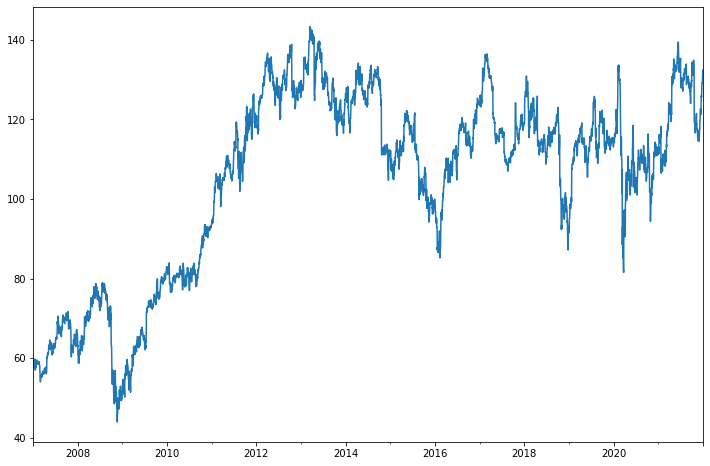

In [10]:
plt.rc("figure", figsize=(12,8))
dfIBM['Adj Close'].plot()

#### We first take the logarithm of time series and then we difference it. From the basic property of logarithm function it follows that in this way we calculate the logarithm of the returns (ratio of the consecutive terms).

In [11]:
df=np.log(dfIBM['Adj Close']).diff().dropna()

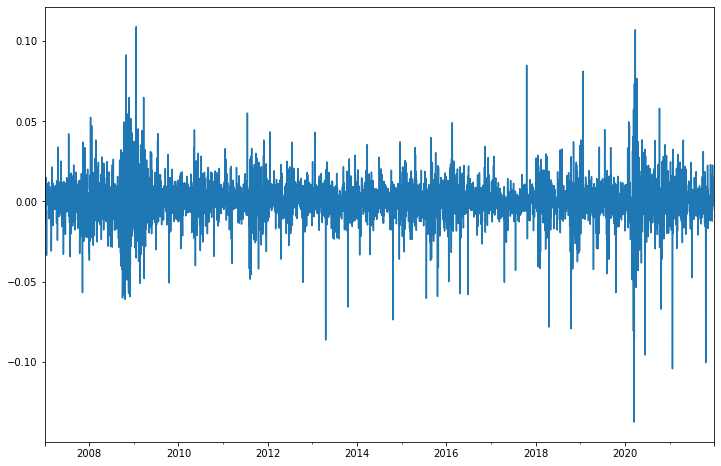

In [12]:
df.plot();

In [13]:
adfuller(df)

(-19.715271706976274,
 0.0,
 13,
 5461,
 {'1%': -3.431548018029579,
  '5%': -2.862069404259016,
  '10%': -2.567051800837696},
 -32263.017903737025)

#### Thus, the log of returns time series is stationary.